In [1]:
from context_analysis.load import load_cells
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cells = load_cells(experiment="pfc")
df_cells = df_cells.assign(
    mouse=pd.Categorical(df_cells["mouse"]),
    group=pd.Categorical(df_cells["group"])
)[["cell_id", "mouse", "group", "session_name"]].drop_duplicates()

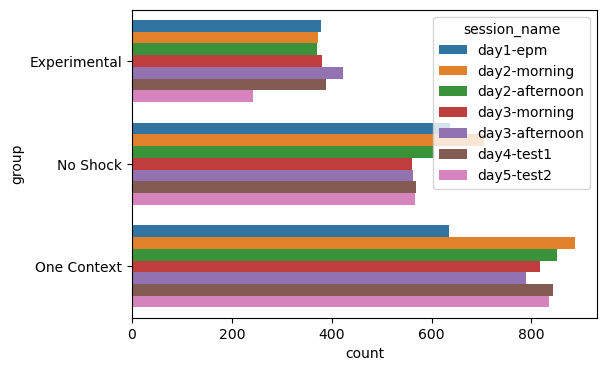

In [9]:
_, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(y="group", hue="session_name", data=df_cells, ax=ax)
plt.show()

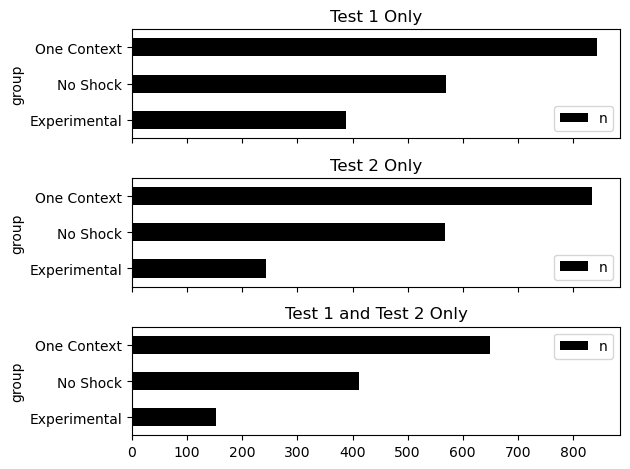

In [53]:
def num_cells_in_each_session(df, session_names):
    return len(
        df.loc[lambda x: x.session_name.isin(session_names)]
        .pivot(index="cell_id", columns="session_name", values="mouse")
        .dropna()
    )

def get_num_neurons_between_sessions(df, session_names, ax):
    df = df.groupby("group", as_index=False).apply(num_cells_in_each_session, session_names=session_names)
    df = df.rename(columns={None:"n"})
    ax = df.plot(kind="barh", y="n", x="group", ax=ax, color="black")
    return ax
    # ax = df.plot(x="", y="", kind="bar", title="Day5", ax=axes[2])
    # return ax

_, axes = plt.subplots(3, sharex=True)
axes[0] = get_num_neurons_between_sessions(df_cells, session_names=["day4-test1"], ax=axes[0])
axes[0].set_title("Test 1 Only")
axes[1] = get_num_neurons_between_sessions(df_cells, session_names=["day5-test2"], ax=axes[1])
axes[1].set_title("Test 2 Only")
axes[2] = get_num_neurons_between_sessions(df_cells, session_names=["day4-test1", "day5-test2"], ax=axes[2])
axes[2].set_title("Test 1 and Test 2 Only")
plt.tight_layout()
plt.show()